In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf


## Reading data-file
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Defining input and target
X = train.drop(columns = ['text', 'reply_to_screen_name', 'hashtags', 'country'], axis = 1)
Y = train['country']
Y = np.where(Y == 'us', 0, 
             np.where(Y == 'uk', 1, 
                      np.where(Y == 'canada', 2, 
                               np.where(Y == 'australia', 3,
                                        np.where(Y == 'ireland', 4, 5)))))

## Splitting the data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.2)

## Scaling the data 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Defining model 
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, input_dim =  15, activation = 'relu'),
#         tf.keras.layers.Dense(10, input_dim =  15, activation = 'relu'),
        tf.keras.layers.Dense(6, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Fitting model 
history = model.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 6), epochs = 10, batch_size = 32, validation_data = (X_test, tf.keras.utils.to_categorical(Y_test, num_classes = 6)))

Epoch 1/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.5038 - accuracy: 0.2886 - val_loss: 1.3780 - val_accuracy: 0.3079
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.3623 - accuracy: 0.3139 - val_loss: 1.3522 - val_accuracy: 0.3185
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.3473 - accuracy: 0.3213 - val_loss: 1.3453 - val_accuracy: 0.3239
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 1.3425 - accuracy: 0.3289 - val_loss: 1.3407 - val_accuracy: 0.3324
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.3392 - accuracy: 0.3380 - val_loss: 1.3382 - val_accuracy: 0.3447
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.3375 - accuracy: 0.3407 - val_loss: 1.3398 - val_accuracy: 0.3413
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.3367 - accuracy: 0.3435 - val_loss: 1.3372 - val_accurac

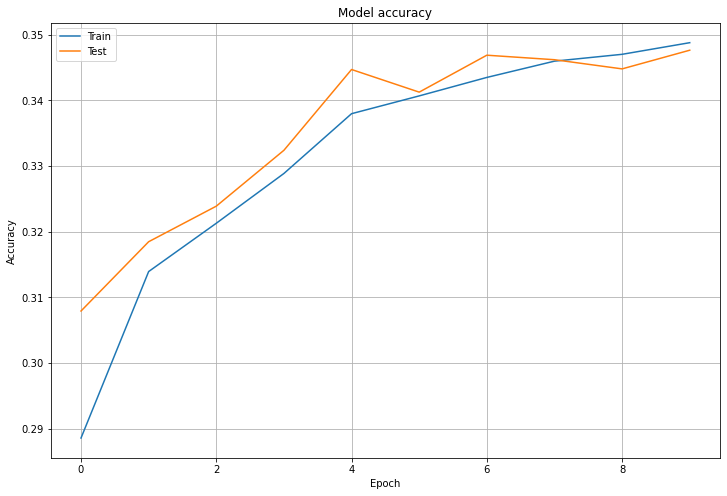

In [40]:
fig = plt.figure(figsize = (12, 8))

## Visualization of accuracy in train and test datasets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.grid()
plt.show()

In [41]:
test = scaler.fit_transform(test)

In [42]:
x = model.predict(test)
x = np.argmax(x, axis = 1)
x

array([5, 5, 5, ..., 4, 5, 1])

In [44]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
# from xgboost import XGBClassifier

from Help_Funs import count_chars, count_words, count_capital_chars, count_capital_words, count_sent, count_unique_words, count_stopwords, count_hashtags 

s3 = boto3.resource('s3')
bucket_name = 'analytics-data-science-competitions'
bucket = s3.Bucket(bucket_name)

file_key_1 = 'Covid-tweets/training_data.csv'
file_key_2 = 'Covid-tweets/test_data.csv'

bucket_object_1 = bucket.Object(file_key_1)
file_object_1 = bucket_object_1.get()
file_content_stream_1 = file_object_1.get('Body')

bucket_object_2 = bucket.Object(file_key_2)
file_object_2 = bucket_object_2.get()
file_content_stream_2 = file_object_2.get('Body')

## Reading data-files
train = pd.read_csv(file_content_stream_1)
test = pd.read_csv(file_content_stream_2)


/home/ec2-user/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [45]:
test_id = test['Id']

In [46]:
data_out = pd.DataFrame({'Id': test_id, 'Category': x})
data_out['Category'] = np.where(data_out['Category'] == 0, 'us',
                                np.where(data_out['Category'] == 1, 'uk',
                                         np.where(data_out['Category'] == 2, 'canada',
                                                  np.where(data_out['Category'] == 3, 'australia',
                                                           np.where(data_out['Category'] == 4, 'ireland', 'new_zealand')))))

# data_out.to_csv('LightGBM_submission_md.csv', index = False)

In [47]:
data_out['Category'].value_counts()

new_zealand    27148
ireland        25973
us              3200
canada          1807
uk              1223
australia        649
Name: Category, dtype: int64

In [48]:
data_out.to_csv('network_submission_md_1.csv', index = False)

In [26]:
history = model.fit(X_train, tf.keras.utils.to_categorical(Y_train, num_classes = 6), epochs = 10, batch_size = 32, validation_data = (X_test, tf.keras.utils.to_categorical(Y_test, num_classes = 6)))

Epoch 1/10
1500/1500 [==============================] - 10s 5ms/step - loss: 1.5473 - accuracy: 0.2863 - val_loss: 1.3979 - val_accuracy: 0.3158
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.3682 - accuracy: 0.3176 - val_loss: 1.3551 - val_accuracy: 0.3280
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 1.3466 - accuracy: 0.3294 - val_loss: 1.3447 - val_accuracy: 0.3352
Epoch 4/10
1500/1500 [==============================] - 7s 4ms/step - loss: 1.3414 - accuracy: 0.3319 - val_loss: 1.3435 - val_accuracy: 0.3346
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 1.3389 - accuracy: 0.3364 - val_loss: 1.3415 - val_accuracy: 0.3311
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 1.3372 - accuracy: 0.3388 - val_loss: 1.3412 - val_accuracy: 0.3410
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 1.3360 - accuracy: 0.3405 - val_loss: 1.3385 - val_accuracy

In [18]:
X_train.shape

(48000, 15)

In [11]:
tf.keras.utils.to_categorical(Y_train, num_classes = 6)

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [9]:
Y_train

array([1, 1, 5, ..., 1, 5, 2])

In [12]:
tf.keras.utils.to_categorical(Y_test, num_classes = 6)

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

In [13]:
Y_test

array([4, 5, 5, ..., 5, 3, 1])